## Last updated on 2020-03-25

This notebook tracks the spread of the novel coronavirus, also known as the 2019-nCoV. It is a contagious respiratory virus that first started in Wuhan in December 2019. As of 02/11/2020, the virus is officially named COVID-19 by the World Health Organization (WHO). The WHO declared the coronavirus outbreak as a pandemic on 03/11/2020.

As of 16th March, India confirmed 116 COVID-19 cases with the state of Maharashtra having the maximum number of cases. As the coronavirus outbreak continues to spread in the country,the question that we as Indians are trying to answer is: whether India will be able to tackle its menance or are we going to witness another Italy or South Korea?

In [1]:
#Import the necessary libraries
import numpy as np 
import pandas as pd 

#For visualization
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#Import dataset
covid19 = pd.read_csv('../input/covid19-india-cases/Covid19_India_Cases.csv')
covid19.head(3)

,Date,Confirmed,Daily Count,Deaths
0,30-01-2020,1,1,0
1,31-01-2020,1,0,0
2,01-02-2020,1,0,0


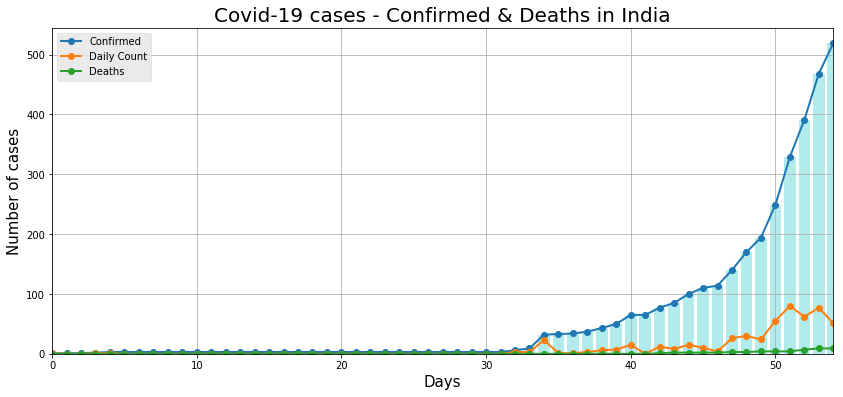

In [3]:
covid19.plot(kind='line', figsize = (14,6) , marker='o',linewidth=2)
plt.bar(covid19.index, covid19['Confirmed'],alpha=0.3,color='c')
plt.xlabel('Days', fontsize=15)
plt.ylabel('Number of cases', fontsize=15)
plt.title('Covid-19 cases - Confirmed & Deaths in India',fontsize=20)
plt.grid(True)
plt.style.use('ggplot')
plt.legend()

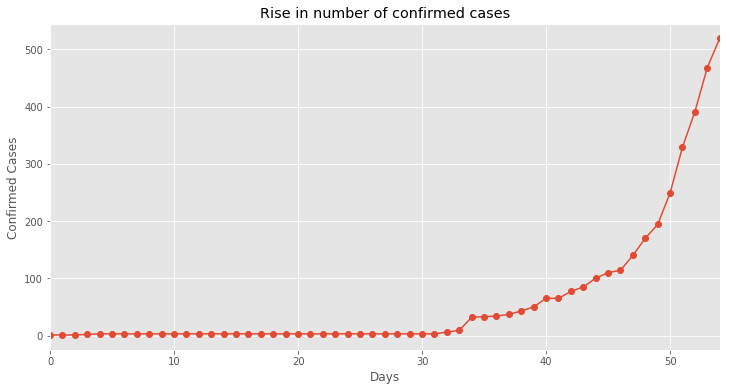

In [4]:
#Plot confirmed cases
covid19['Confirmed'].plot(kind='line', figsize = (12,6) , marker='o')
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.title('Rise in number of confirmed cases')
plt.grid(True)
plt.show()

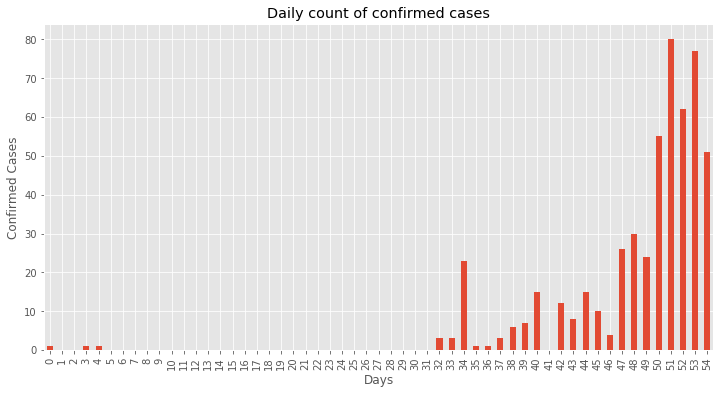

In [5]:
#Plot daily count
covid19['Daily Count'].plot(kind='bar', figsize = (12,6))
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.title('Daily count of confirmed cases')
plt.grid(True)
plt.show()

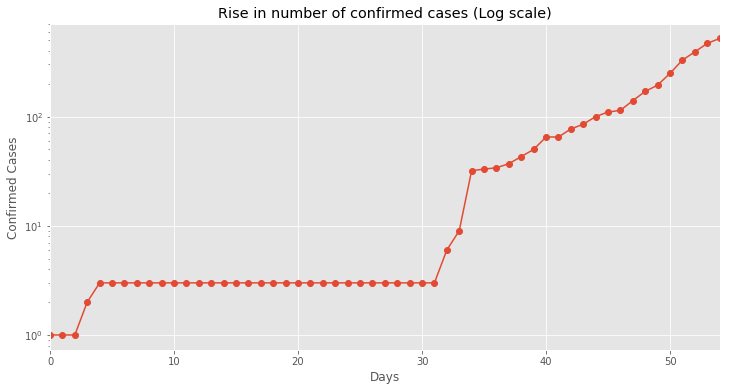

In [6]:
#Plot confirmed cases
covid19['Confirmed'].plot(kind='line', figsize = (12,6), marker='o')
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.title('Rise in number of confirmed cases (Log scale)')
plt.yscale('log')
plt.grid(True)
plt.show()

In [7]:
#Recent cases - Cases from March
covidM = covid19[covid19['Confirmed']>3]
covidM.head(3)

,Date,Confirmed,Daily Count,Deaths
32,02-03-2020,6,3,0
33,03-03-2020,9,3,0
34,04-03-2020,32,23,0


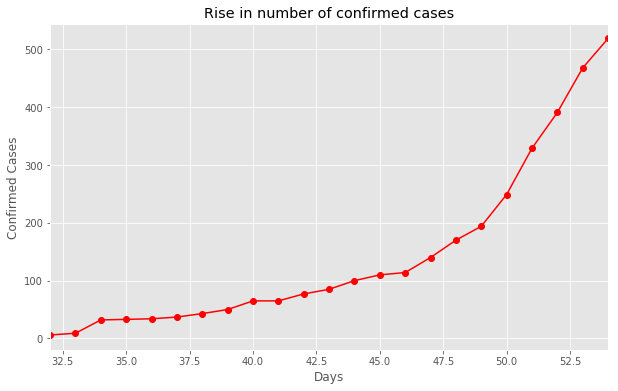

In [8]:
#Plot confirmed cases
covidM['Confirmed'].plot(kind='line', figsize = (10,6), marker='o', color='r')
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.title('Rise in number of confirmed cases')
plt.grid(True)
plt.show()

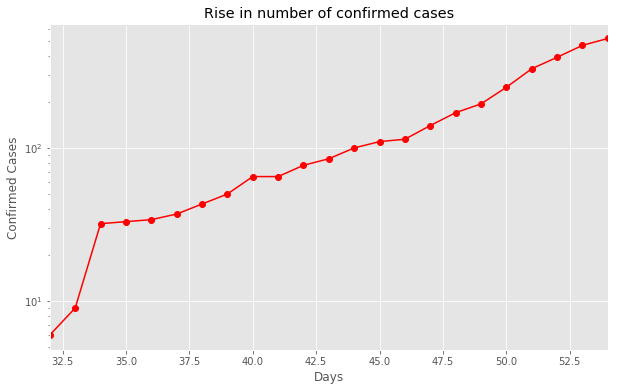

In [9]:
#Plot confirmed cases
covidM['Confirmed'].plot(kind='line', figsize = (10,6), marker='o', color='r')
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.title('Rise in number of confirmed cases')
plt.yscale('log')
plt.grid(True)
plt.show()

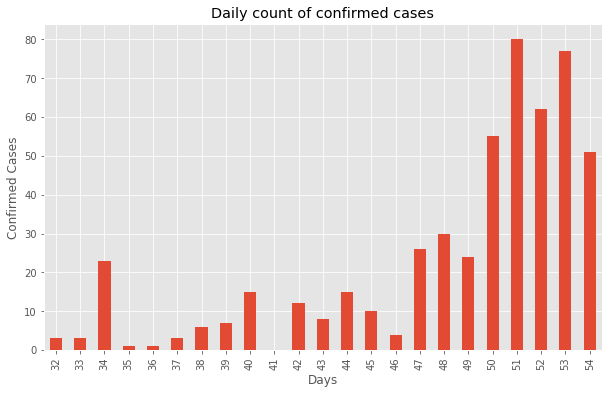

In [10]:
#Plot daily count
covidM['Daily Count'].plot(kind='bar', figsize = (10,6))
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.title('Daily count of confirmed cases')
plt.grid(True)
plt.show()

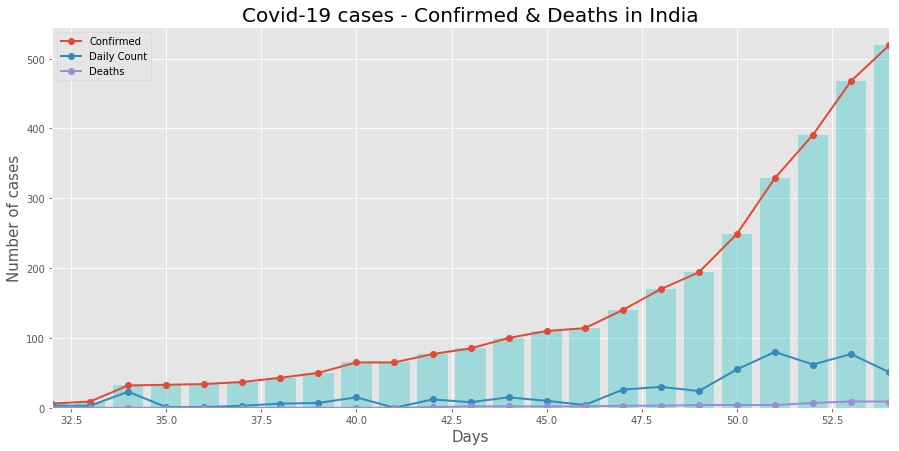

In [11]:
covidM.plot(kind='line', figsize = (15,7) , marker='o',linewidth=2)
plt.bar(covidM.index, covidM['Confirmed'],alpha=0.3,color='c')
plt.xlabel('Days', fontsize=15)
plt.ylabel('Number of cases', fontsize=15)
plt.title('Covid-19 cases - Confirmed & Deaths in India',fontsize=20)
plt.grid(True)
plt.style.use('ggplot')
plt.legend()

In [12]:
confirmed = covidM[[ 'Date','Confirmed']]
confirmed.head()

,Date,Confirmed
32,02-03-2020,6
33,03-03-2020,9
34,04-03-2020,32
35,05-03-2020,33
36,06-03-2020,34


In [13]:
confirmed.columns = ['ds','y']
confirmed['ds'] = pd.to_datetime(confirmed['ds'], dayfirst= True, format='%d-%m-%Y')
confirmed.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,ds,y
32,2020-03-02,6
33,2020-03-03,9
34,2020-03-04,32
35,2020-03-05,33
36,2020-03-06,34


In [14]:
from fbprophet import Prophet
m = Prophet(interval_width=0.95)
m.fit(confirmed)
future = m.make_future_dataframe(periods=15)
future_confirmed = future.copy() # for non-baseline predictions later on
future.tail()

,ds
33,2020-04-04
34,2020-04-05
35,2020-04-06
36,2020-04-07
37,2020-04-08


In [15]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
33,2020-04-04,557.216932,427.866301,695.805586
34,2020-04-05,583.208560,454.444059,713.012444
35,2020-04-06,628.360003,498.352032,760.194314
36,2020-04-07,652.102922,524.264316,791.680036
37,2020-04-08,624.876327,500.108166,752.263995


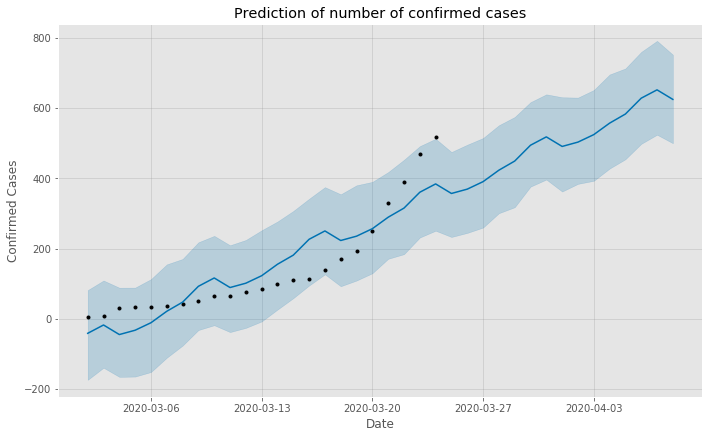

In [16]:
confirmed_forecast_plot = m.plot(forecast)
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Prediction of number of confirmed cases')
plt.grid(True)
plt.show()